# Auto Insurance Fraud Detection 

#### Necessary Libraries

In [1]:
from sklearn.model_selection import train_test_split # splitting data to train and test
from sklearn.preprocessing import RobustScaler #scaling data using robust because of outliers
from sklearn.preprocessing import StandardScaler
import pandas as pd
import missingno as msno # visualising the missing values
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC # Support vector machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

plt.style.use('ggplot')

/Users/su/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/su/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


#### Download the data

In [2]:
data_path = '/Users/su/Desktop/insurance_claims.csv'
df = pd.read_csv(data_path, keep_default_na=False)

# Print df
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17/10/2014           OH   
1                 228   42         342868       27/06/2006           IN   
2                 134   29         687698       06/09/2000           OH   
3                 256   41         227811       25/05/1990           IL   
4                 228   44         367455       06/06/2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [3]:
print(df['authorities_contacted'].head())

0    Police
1    Police
2    Police
3    Police
4      None
Name: authorities_contacted, dtype: object


In [4]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

#### Check for Missing values

There are no missing values in  authorities_contacted. Although some cols have "?" so we should remove the data that has them to see how many missing values are there.

In [5]:
# Replace '?' with NaN
df_cleaned = df.replace('?', pd.NA)

In [6]:
df_cleaned.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

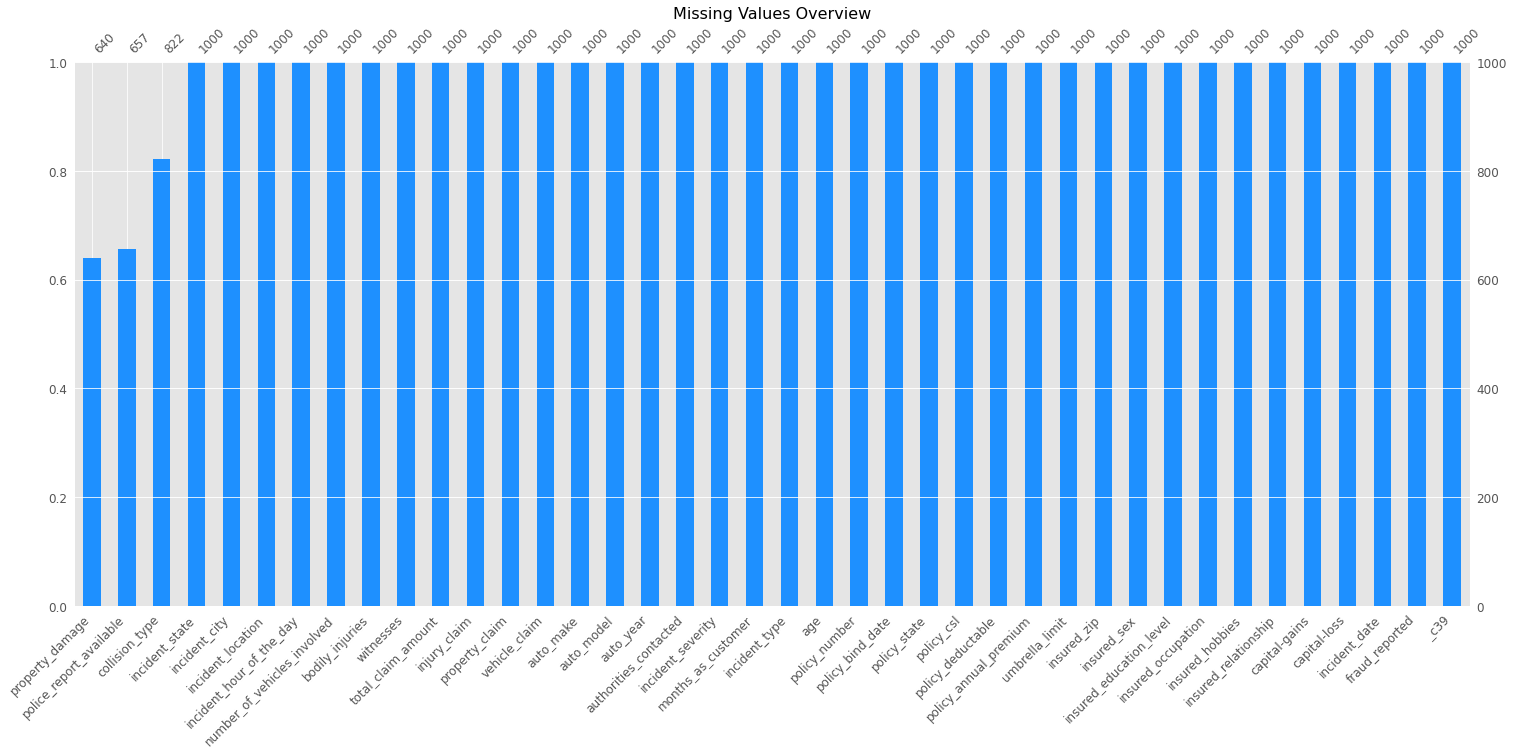

In [7]:
# Visualizing missing values with missingno's bar plot
plt.figure(figsize=(12, 6))
msno.bar(df_cleaned, fontsize=12, color='dodgerblue', sort='ascending')
plt.title('Missing Values Overview', fontsize=16)
plt.show()

### Impute the Missing values with mode since they are categorical vars

In [8]:
# Impute missing values in non-numeric columns using the mode (most frequent value)
df_cleaned['collision_type'] = df_cleaned['collision_type'].fillna(df_cleaned['collision_type'].mode()[0])
df_cleaned['property_damage'] = df_cleaned['property_damage'].fillna(df_cleaned['property_damage'].mode()[0])
df_cleaned['police_report_available'] = df_cleaned['police_report_available'].fillna(df_cleaned['police_report_available'].mode()[0])

# Now, let's check if there are any remaining missing values
missing_values_after_mode = df_cleaned.isnull().sum()

# Display the columns with remaining missing values, if any
missing_values_after_mode[missing_values_after_mode > 0]

Series([], dtype: int64)

In [9]:
# remove _c39 since there is no data
df_cleaned = df_cleaned.drop(columns=['_c39'])

In [10]:
df_cleaned.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

## EDA

In [11]:
# Summary statistics for numerical columns
summary_stats = df_cleaned.describe()
display(summary_stats)

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

1) months_as_customer:
* Max: 479 months (~40 years), which is quite high, showing some very long-term customers.

2) umbrella_limit:
* Min: -1,000,000 (a negative value), which seems unusual for an umbrella limit. Could indicate data errors or special cases.
* Max: 10,000,000, a very high umbrella limit, likely for premium customers.

3) capital-gains:
* Mean: 25,126, but the median (50%) is 0, indicating that many customers have no capital gains, with some having very high gains skewing the mean.

4) capital-loss:
* Min: -111,100, a large negative value, which stands out.

5) incident_hour_of_the_day:
* Distribution: Ranges from 0 to 23, suggesting incidents happen throughout the day, without missing hours.

6) total_claim_amount:
* Max: 114,920, indicating some very high claims, although most claims hover around the mean of 52,761.

7) auto_year:
* Min/Max: Ranges from 1995 to 2015, showing the cars involved are relatively recent (no cars older than 1995).

In [12]:
# Summary statistics for categorical columns
categorical_summary = df_cleaned.select_dtypes(include=['object']).describe()
display(categorical_summary)

policy_bind_date policy_state policy_csl insured_sex  \
count              1000         1000       1000        1000   
unique              951            3          3           2   
top          01/01/2006           OH    250/500      FEMALE   
freq                  3          352        351         537   

       insured_education_level insured_occupation insured_hobbies  \
count                     1000               1000            1000   
unique                       7                 14              20   
top                         JD  machine-op-inspct         reading   
freq                       161                 93              64   

       insured_relationship incident_date            incident_type  ...  \
count                  1000          1000                     1000  ...   
unique                    6            60                        4  ...   
top               own-child    02/02/2015  Multi-vehicle Collision  ...   
freq                    183            28                      419  ...   

       incident_severity authorities_contacted incident_state incident_city  \
count               1000                  1000           1000          1000   
unique                 4                     5              7             7   
top         Minor Damage                Police             NY   Springfield   
freq                 354                   292            262           157   

       incident_location property_damage police_report_available auto_make  \
count               1000            1000                    1000      1000   
unique              1000               2                       2        14   
top       9935 4th Drive              NO                      NO      Saab   
freq                   1             698                     686        80   

       auto_model fraud_reported  
count        1000           1000  
unique         39              2  
top           RAM              N  
freq           43            753  

[4 rows x 21 columns]

1) incident_type:
* Multi-vehicle collisions make up 419 cases, showing that the majority of incidents involve multiple vehicles, which could imply more complex claims.

2) property_damage:
* 698 cases report NO property damage, a large portion, which might imply that many claims could be related to bodily injury or other non-property issues.

3) police_report_available:
* In 686 cases, no police report was available, which could indicate a lack of formal documentation for many incidents, potentially affecting claim processing.

4) fraud_reported:
* Fraud was not reported in 753 cases, showing that most claims are not flagged as fraudulent, but it still leaves a significant portion (about 25%) where fraud might be a concern.


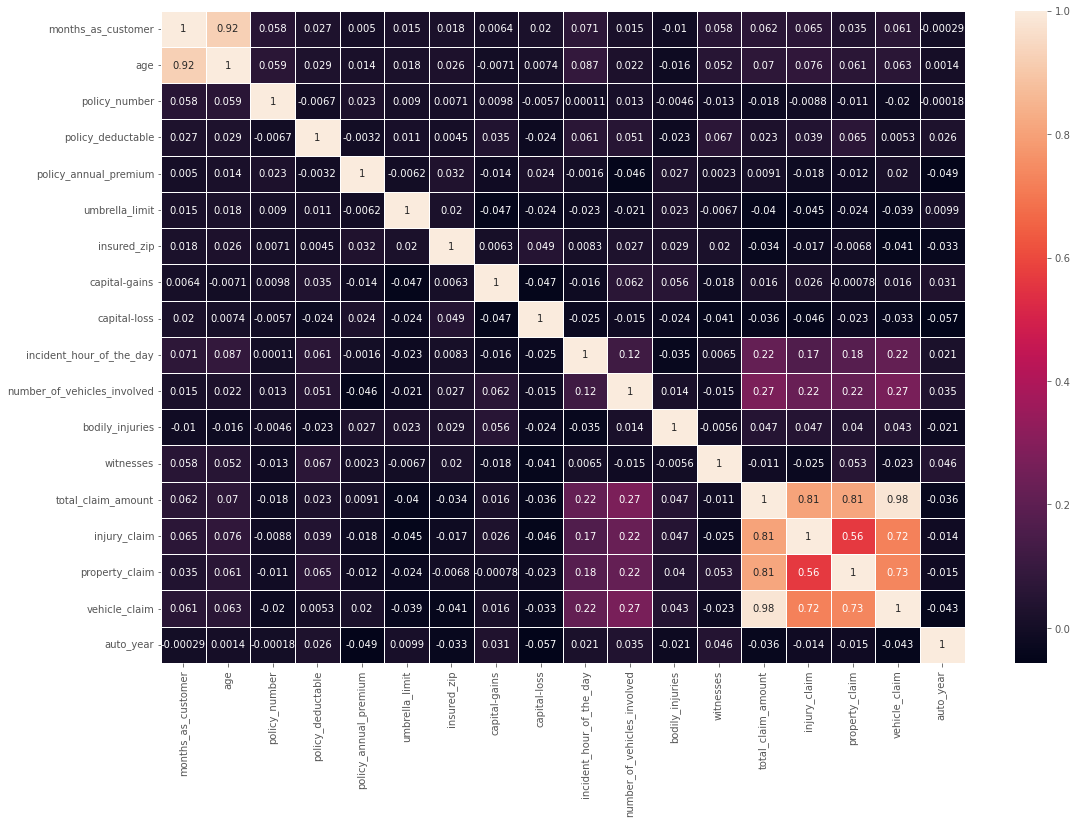

In [13]:
# Select numeric columns
numeric_df = df_cleaned.select_dtypes(include=[np.number])
corr = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidths=1)
plt.show()

In [14]:
df_cleaned.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

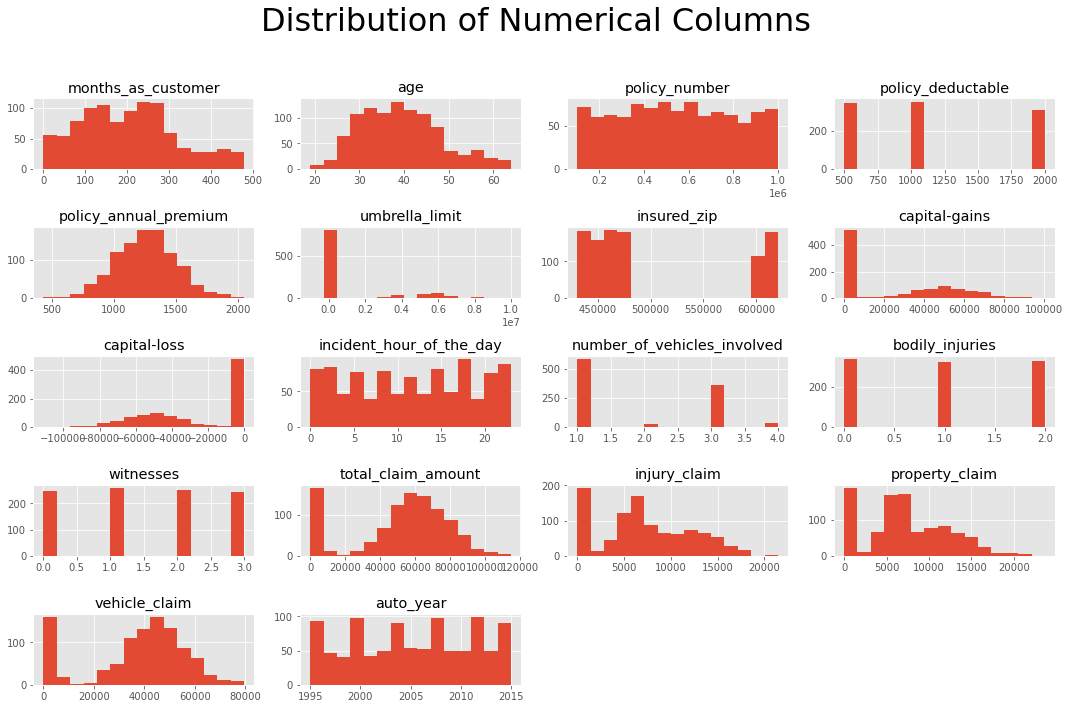

In [15]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

df_cleaned[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Columns', size=32)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

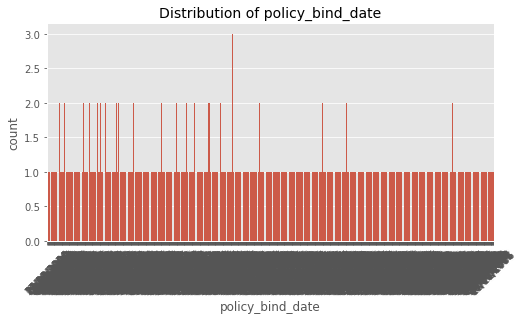

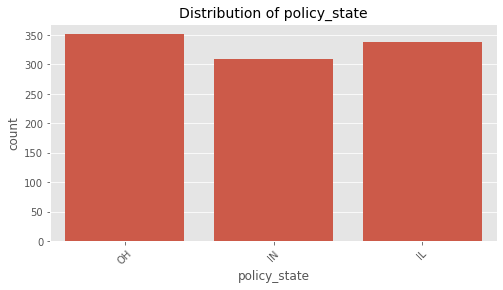

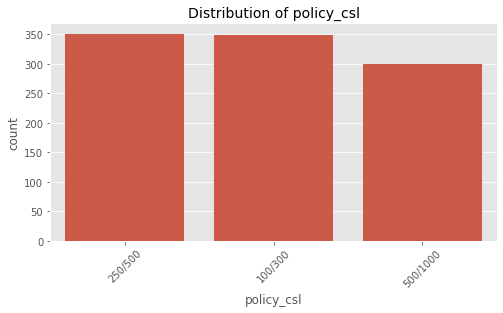

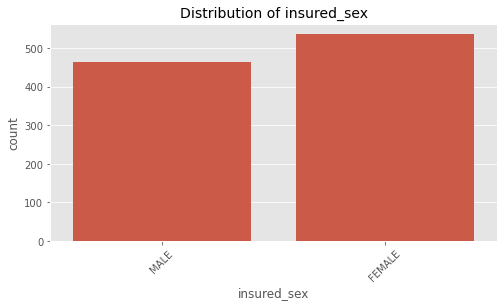

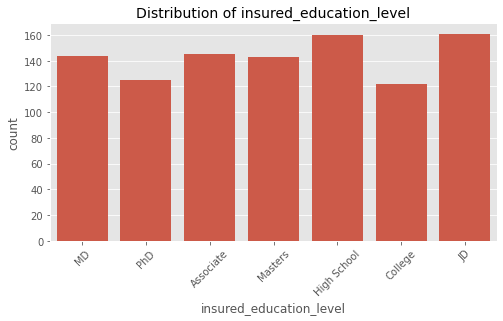

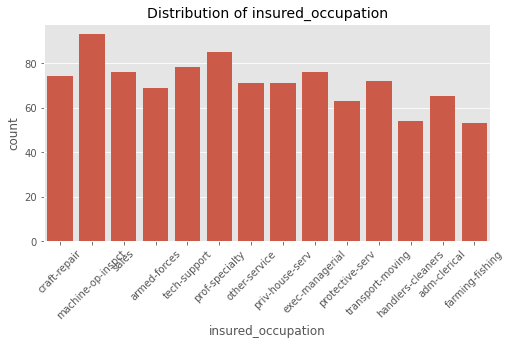

In [16]:
# Step 2: Visualizing the frequency distribution of categorical columns using bar plots
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns (only the first few for visibility)
for col in categorical_cols[:6]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f'Distribution of {col}', size=14)
    plt.xticks(rotation=45)
    plt.show()

In [17]:
# dropping columns not needed

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model']

df_cleaned.drop(to_drop, inplace = True, axis = 1)

In [18]:
print(df_cleaned.head())

   months_as_customer  age policy_csl  policy_deductable  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_relationship  ...  property_damage  \
0       craft-repair              husband  ...              YES   
1  machine-op-inspct    

### Checking for Multicollinearity

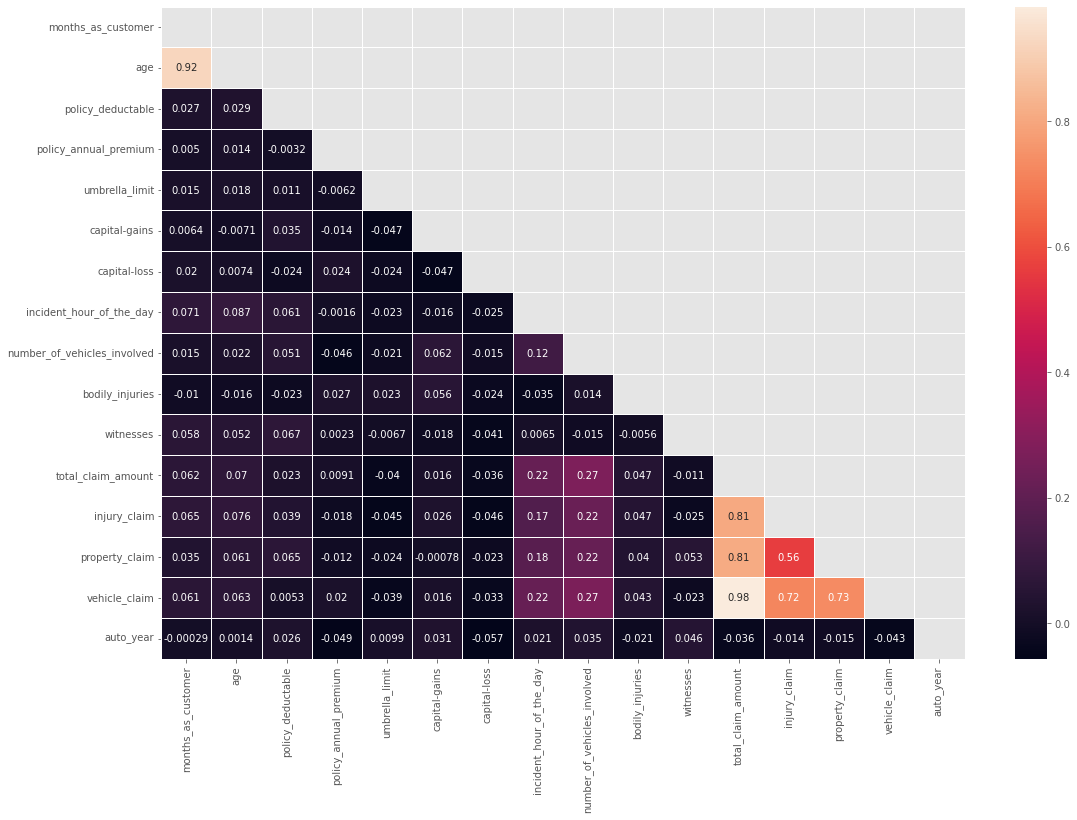

In [19]:
plt.figure(figsize = (18, 12))

numeric_df = df_cleaned.select_dtypes(include=[np.number])

corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

**highly correlated variables:**
1) age and months as customer - 0.92

2) injury claim and total claim amount - 0.81

3) property claim and total claim amount - 0.81

4) propery claim and injury claim - 0.56

5) vehicle claim and total claim amount - 0.98

6) vechicle claim and injury claim - 0.72

7) vehicle claim and propery claim - 0.73

In [20]:
# Step 1: Add a constant term to numerical df
numeric_df_with_constant = sm.add_constant(numeric_df)

# Step 2: Create an empty DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df_with_constant.columns

# Step 3: Calculate VIF for each feature
vif_data['VIF'] = [
    variance_inflation_factor(numeric_df_with_constant.values, i)
    for i in range(numeric_df_with_constant.shape[1])
]

print(vif_data)

                        Feature           VIF
0                         const  1.129251e+05
1            months_as_customer  6.772320e+00
2                           age  6.786070e+00
3             policy_deductable  1.022162e+00
4         policy_annual_premium  1.010877e+00
5                umbrella_limit  1.007245e+00
6                 capital-gains  1.016320e+00
7                  capital-loss  1.013110e+00
8      incident_hour_of_the_day  1.067956e+00
9   number_of_vehicles_involved  1.096947e+00
10              bodily_injuries  1.011010e+00
11                    witnesses  1.023304e+00
12           total_claim_amount           inf
13                 injury_claim           inf
14               property_claim           inf
15                vehicle_claim           inf
16                    auto_year  1.014261e+00


/Users/su/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


We will remove age and total claim to avoid multicollinearty


In [21]:
df_cleaned.drop(['age', 'total_claim_amount','auto_year'], axis=1, inplace=True, errors='ignore')

In [22]:
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
numeric_df = df_cleaned[numeric_cols]

In [23]:
# Add a constant term for the intercept
numeric_df_with_constant = sm.add_constant(numeric_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df_with_constant.columns
vif_data['VIF'] = [
    variance_inflation_factor(numeric_df_with_constant.values, i)
    for i in range(numeric_df_with_constant.shape[1])
]

# Display the VIF DataFrame
print("VIF after removing high VIF variables and 'age':")
print(vif_data)

VIF after removing high VIF variables and 'age':
                        Feature        VIF
0                         const  44.656762
1            months_as_customer   1.014217
2             policy_deductable   1.021938
3         policy_annual_premium   1.008014
4                umbrella_limit   1.007044
5                 capital-gains   1.014405
6                  capital-loss   1.009423
7      incident_hour_of_the_day   1.064712
8   number_of_vehicles_involved   1.094956
9               bodily_injuries   1.010333
10                    witnesses   1.021382
11                 injury_claim   2.126171
12               property_claim   2.212941
13                vehicle_claim   3.212874


All the variables now have VIF values well below 5, which indicates low multicollinearity.

## Handling Categorical Vars

In [24]:
# separating the feature and target columns
X = df_cleaned.drop('fraud_reported', axis = 1)
y = df_cleaned['fraud_reported']

In [25]:
cat_df = X.select_dtypes(include = ['object'])
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police              NO   
2      Minor Damage                Police              NO   
3      Major Damage                Police              NO   
4      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [26]:
# Unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [27]:
cat_df = pd.get_dummies(cat_df, drop_first=True).astype(int)

In [28]:
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 41 columns]

In [29]:
num_df = X.select_dtypes(include = ['int64'])

In [30]:
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [31]:
X = pd.concat([num_df, cat_df], axis = 1)

In [32]:
X.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  ...  \
0                1          2          6510  ...   
1                0          0           780  ...   
2                2          3          7700  ...   
3                1          2          6340  ...   
4                0          1          1300  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                              1                               0   
1                              0                               1   
2                              0                               1   
3                              0                               0   
4                              0                               1   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  \
0                            0                             1   
1                            0                             1   
2                            0                             1   
3                            0                             1   
4                            0                             0   

   property_damage_YES  police_report_available_YES  
0                    1                            1  
1                    0                            0  
2                    0                            0  
3                    0                            0  
4                    0                            0  

[5 rows x 53 columns]

In [33]:
# Split the data 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
887                 441                500         4000000          24000   
317                 275               2000               0          39400   
796                 421                500         4000000          49500   
425                   4                500               0              0   
991                 257               1000               0          59400   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
887        -50500                         4                            1   
317        -63900                         8                            3   
796        -81100                         7                            1   
425             0                         0                            4   
991        -32200                        21                            1   

     bodily_injuries  witnesses  injury_claim  ...  \
887                0          0           640  ...   
317                1          1          5360  ...   
796                2          3         16860  ...   
425                0          0          6080  ...   
991                0          1             0  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
887                              0                               1   
317                              1                               0   
796                              0                               0   
425                              1                               0   
991                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
887                             0                                 0   
317                             1                                 0   
796                             0                                 0   
425                             0                                 0   
991                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
887                           0                           1   
317                           0                           0   
796                           0                           0   
425                           0                           0   
991                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
887                            0                             0   
317                            0                             0   
796                            0                             0   
425                            0                             1   
991                            1                             0   

     property_damage_YES  police_report_available_YES  
887                    0                            0  
317                    1                            0  
796                    0                            0  
425                    0                            0  
991                    0                            0  

[5 rows x 53 columns]

## Scaling the numerical vars

In [35]:
# Select numerical features
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                  'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                  'injury_claim', 'property_claim', 'vehicle_claim']]

cat_df = X_train.drop(columns=num_df)

# Initialize the scaler and fit it on the training data
scaler = RobustScaler()
X_train_numerical = scaler.fit_transform(num_df)

# Transform the test data's numerical features
X_test_numerical = scaler.transform(X_test[num_df.columns])

# Encode categorical variables for both train and test sets using cat_df
dummy_features_train = pd.get_dummies(cat_df, drop_first=True).astype(int)
dummy_features_test = pd.get_dummies(X_test[cat_df.columns], drop_first=True).astype(int)

# Ensure the columns match between train and test dummy features
dummy_features_test = dummy_features_test.reindex(columns=dummy_features_train.columns, fill_value=0)

# Concatenate scaled numerical features and dummy features for both sets
X_train_scaled = np.concatenate([X_train_numerical, dummy_features_train.values], axis=1)
X_test_scaled = np.concatenate([X_test_numerical, dummy_features_test.values], axis=1)

# Combine columns back together to create DataFrames
scaled_columns = num_df.columns.tolist() + dummy_features_train.columns.tolist()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaled_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaled_columns)

In [36]:
X_train_scaled.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0            1.491420          -0.333333       4000000.0       0.476190   
1            0.455538           0.666667             0.0       0.781746   
2            1.366615          -0.333333       4000000.0       0.982143   
3           -1.235569          -0.333333             0.0       0.000000   
4            0.343214           0.000000             0.0       1.178571   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0     -0.574228                 -0.727273                          0.0   
1     -0.836845                 -0.363636                          1.0   
2     -1.173934                 -0.454545                          0.0   
3      0.415483                 -1.090909                          1.5   
4     -0.215581                  0.818182                          0.0   

   bodily_injuries  witnesses  injury_claim  ...  \
0             -0.5       -1.0     -0.830695  ...   
1              0.0        0.0     -0.181005  ...   
2              0.5        2.0      1.401927  ...   
3             -0.5       -1.0     -0.081900  ...   
4             -0.5        0.0     -0.918789  ...   

   collision_type_Side Collision  incident_severity_Minor Damage  \
0                            0.0                             1.0   
1                            1.0                             0.0   
2                            0.0                             0.0   
3                            1.0                             0.0   
4                            0.0                             0.0   

   incident_severity_Total Loss  incident_severity_Trivial Damage  \
0                           0.0                               0.0   
1                           1.0                               0.0   
2                           0.0                               0.0   
3                           0.0                               0.0   
4                           1.0                               0.0   

   authorities_contacted_Fire  authorities_contacted_None  \
0                         0.0                         1.0   
1                         0.0                         0.0   
2                         0.0                         0.0   
3                         0.0                         0.0   
4                         0.0                         0.0   

   authorities_contacted_Other  authorities_contacted_Police  \
0                          0.0                           0.0   
1                          0.0                           0.0   
2                          0.0                           0.0   
3                          0.0                           1.0   
4                          1.0                           0.0   

   property_damage_YES  police_report_available_YES  
0                  0.0                          0.0  
1                  1.0                          0.0  
2                  0.0                          0.0  
3                  0.0                          0.0  
4                  0.0                          0.0  

[5 rows x 53 columns]

# Modells

## 1) Support Vector Machine Classifier

In [37]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled)

# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train_scaled))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7525
Test accuracy of Support Vector Classifier is : 0.755
[[151   0]
 [ 49   0]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86       151
           Y       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



/Users/su/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/su/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/su/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 2) KNN Classifier 

### Find the optimal number of Ks

The optimal number of neighbors is 6 with an accuracy of 0.7500


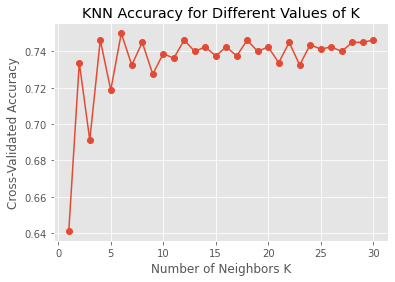

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Define a range of k values to test
k_values = range(1, 31)
cv_scores = []  # To store the cross-validation scores for each k

# Perform cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k that has the highest average accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k} with an accuracy of {max(cv_scores):.4f}")

# Plotting the results
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy for Different Values of K")
plt.show()

In [39]:
# Initialize and train KNN with optimal k
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy for training and test sets
knn_train_acc = accuracy_score(y_train, knn.predict(X_train_scaled))
knn_test_acc = accuracy_score(y_test, y_pred_knn)

# Generate confusion matrix and classification report
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn)

# Display results
print(f"Training Accuracy of KNN: {knn_train_acc:.4f}")
print(f"Test Accuracy of KNN: {knn_test_acc:.4f}")
print("Confusion Matrix:")
print(knn_conf_matrix)
print("Classification Report:")
print(knn_class_report)

Training Accuracy of KNN: 0.7725
Test Accuracy of KNN: 0.7500
Confusion Matrix:
[[143   8]
 [ 42   7]]
Classification Report:
              precision    recall  f1-score   support

           N       0.77      0.95      0.85       151
           Y       0.47      0.14      0.22        49

    accuracy                           0.75       200
   macro avg       0.62      0.54      0.53       200
weighted avg       0.70      0.75      0.70       200



## 3) Gradient Boosting Classifier


In [40]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

gb_train_acc = accuracy_score(y_train, gb_model.predict(X_train_scaled))
gb_test_acc = accuracy_score(y_test, y_pred_gb)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)
gb_class_report = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting - Training Accuracy: {gb_train_acc:.4f}")
print(f"Gradient Boosting - Test Accuracy: {gb_test_acc:.4f}")
print("Gradient Boosting - Confusion Matrix:")
print(gb_conf_matrix)
print("Gradient Boosting - Classification Report:")
print(gb_class_report)

Gradient Boosting - Training Accuracy: 0.9200
Gradient Boosting - Test Accuracy: 0.7800
Gradient Boosting - Confusion Matrix:
[[136  15]
 [ 29  20]]
Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           N       0.82      0.90      0.86       151
           Y       0.57      0.41      0.48        49

    accuracy                           0.78       200
   macro avg       0.70      0.65      0.67       200
weighted avg       0.76      0.78      0.77       200



## 4) Random Forest Classifier

In [41]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Random Forest Evaluation
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train_scaled))
rf_test_acc = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest - Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest - Test Accuracy: {rf_test_acc:.4f}")
print("Random Forest - Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest - Classification Report:")
print(rf_class_report)


Random Forest - Training Accuracy: 1.0000
Random Forest - Test Accuracy: 0.7600
Random Forest - Confusion Matrix:
[[141  10]
 [ 38  11]]
Random Forest - Classification Report:
              precision    recall  f1-score   support

           N       0.79      0.93      0.85       151
           Y       0.52      0.22      0.31        49

    accuracy                           0.76       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.72      0.76      0.72       200



## Model Comparison

In [42]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN','Random Forest','Gradient Boost'],
    'Score' : [svc_test_acc, knn_test_acc,rf_test_acc, gb_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model  Score
3  Gradient Boost  0.780
2   Random Forest  0.760
0             SVC  0.755
1             KNN  0.750

In [43]:
# Plot bar chart
fig = px.bar(data_frame=models, x='Score', y='Model', color='Score', template='plotly_dark', 
             title='Model Comparison by Test Accuracy')
fig.show()

## Analysing Results

In [44]:
# Define numerical and categorical feature columns
num_features = ['months_as_customer', 'policy_deductable', 'umbrella_limit', 
                'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 
                'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                'injury_claim', 'property_claim', 'vehicle_claim']
cat_features = df_cleaned.select_dtypes(include='object').columns.tolist()

# 1. Scale Numerical Features with the fitted scaler
X_numerical_full = scaler.transform(df_cleaned[num_features])

# 2. Encode Categorical Features, ensuring alignment with training columns
X_categorical_full = pd.get_dummies(df_cleaned[cat_features], drop_first=True).astype(int)
X_categorical_full = X_categorical_full.reindex(columns=dummy_features_train.columns, fill_value=0)

# 3. Combine numerical and categorical features with aligned column names
X_scaled_full = np.concatenate([X_numerical_full, X_categorical_full.values], axis=1)
X_scaled_full = pd.DataFrame(X_scaled_full, columns=scaled_columns)  # Use the same column names as X_train_scaled


In [49]:
# Generate predictions for the entire dataset
y_pred_full = gb_model.predict(X_scaled_full)

df_cleaned['Fraud_Prediction'] = y_pred_full

In [51]:
print(df_cleaned.head())

   months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ...  number_of_vehicles_involved  \

In [55]:
# demographic
demographic_columns = [ 'insured_sex', 'insured_education_level', 'insured_occupation']  

# Calculate summary statistics
demographics_summary = df_cleaned[demographic_columns].describe()
print("Summary Statistics for Demographic Features:")
print(demographics_summary)

Summary Statistics for Demographic Features:
       insured_sex insured_education_level insured_occupation
count         1000                    1000               1000
unique           2                       7                 14
top         FEMALE                      JD  machine-op-inspct
freq           537                     161                 93


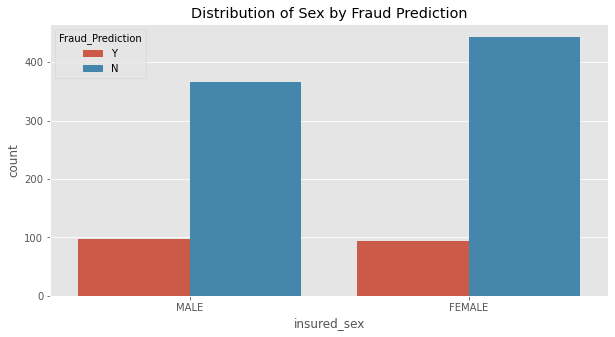

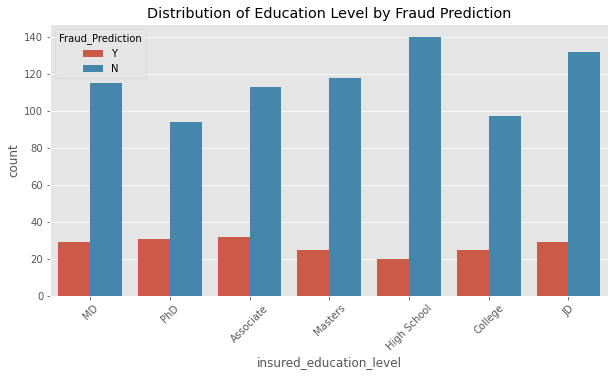

In [60]:
# Countplot for Sex and Education Level by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='insured_sex', hue='Fraud_Prediction')
plt.title("Distribution of Sex by Fraud Prediction")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='insured_education_level', hue='Fraud_Prediction')
plt.title("Distribution of Education Level by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

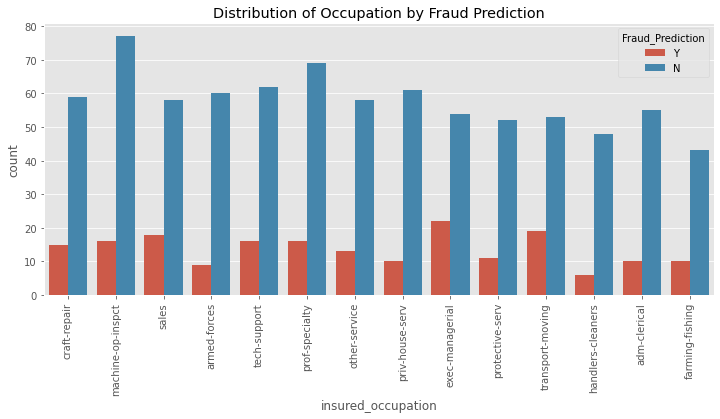

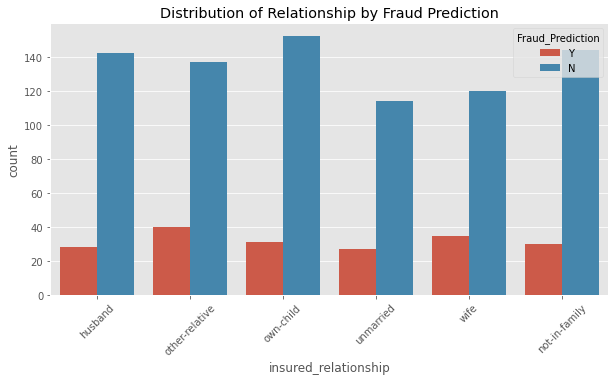

In [61]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df_cleaned, x='insured_occupation', hue='Fraud_Prediction')
plt.title("Distribution of Occupation by Fraud Prediction")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='insured_relationship', hue='Fraud_Prediction')
plt.title("Distribution of Relationship by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

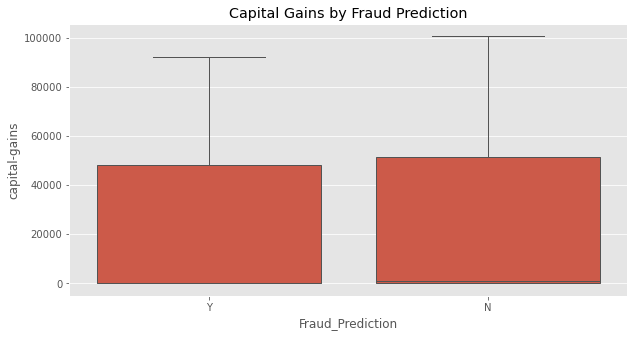

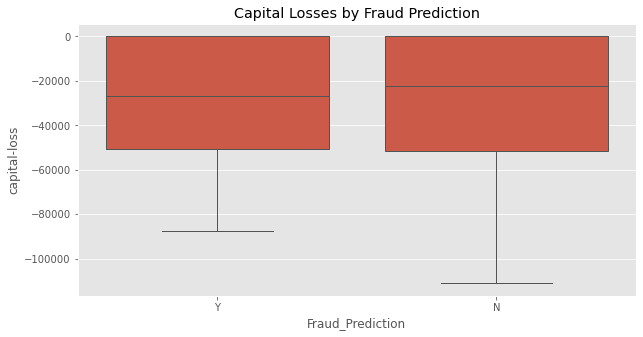

In [62]:
# Boxplot for Capital Gains and Losses by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='capital-gains')
plt.title("Capital Gains by Fraud Prediction")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='capital-loss')
plt.title("Capital Losses by Fraud Prediction")
plt.show()

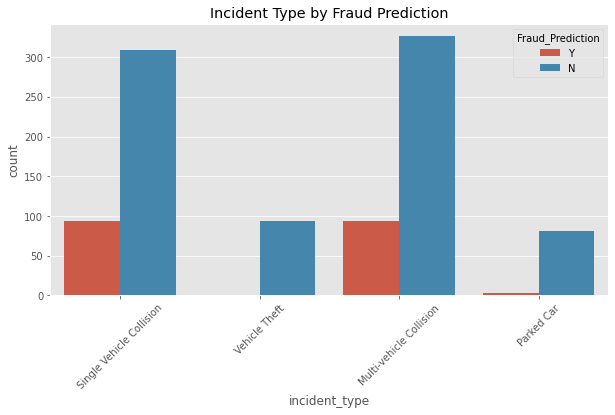

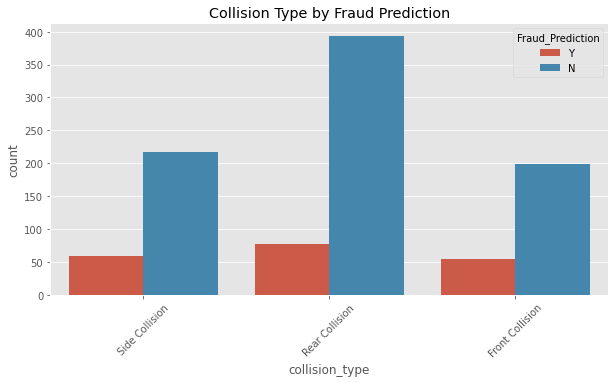

In [63]:
# Countplot for Incident Type and Collision Type by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='incident_type', hue='Fraud_Prediction')
plt.title("Incident Type by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='collision_type', hue='Fraud_Prediction')
plt.title("Collision Type by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

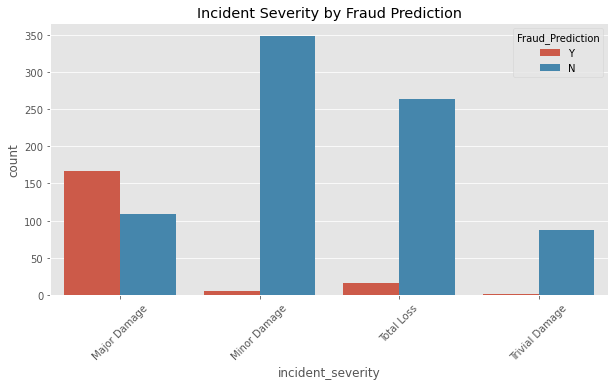

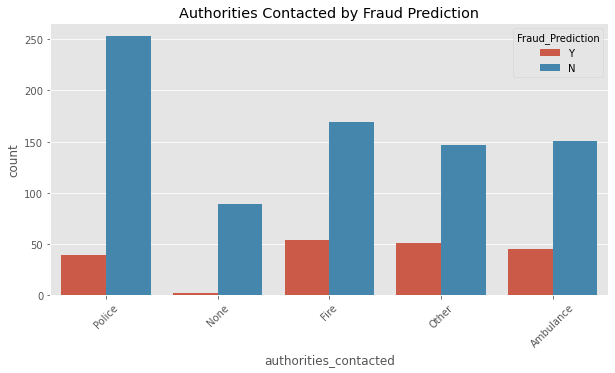

In [64]:
# Countplot for Incident Severity and Authorities Contacted by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='incident_severity', hue='Fraud_Prediction')
plt.title("Incident Severity by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='authorities_contacted', hue='Fraud_Prediction')
plt.title("Authorities Contacted by Fraud Prediction")
plt.xticks(rotation=45)
plt.show()

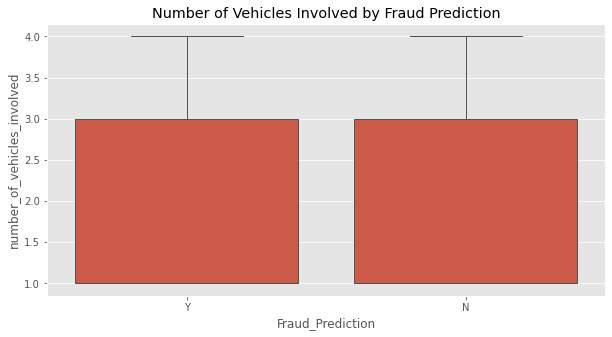

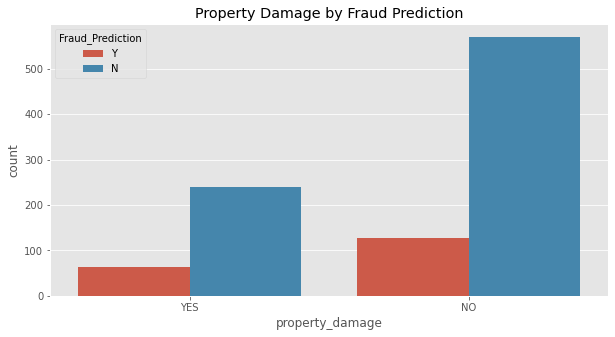

In [65]:
# Boxplot for Number of Vehicles Involved by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='number_of_vehicles_involved')
plt.title("Number of Vehicles Involved by Fraud Prediction")
plt.show()

# Countplot for Property Damage by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='property_damage', hue='Fraud_Prediction')
plt.title("Property Damage by Fraud Prediction")
plt.show()

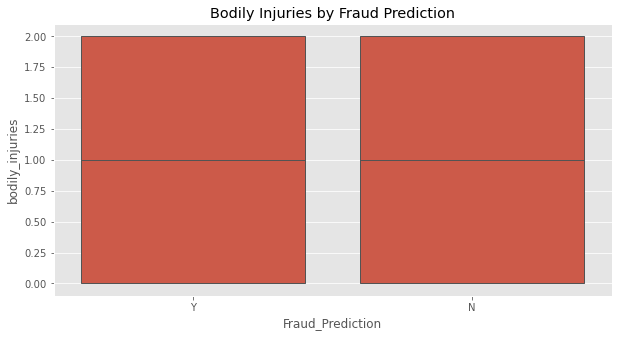

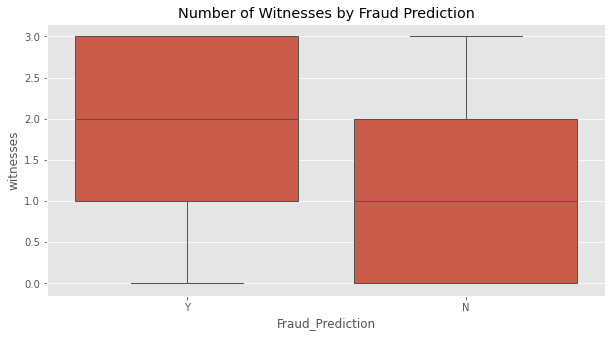

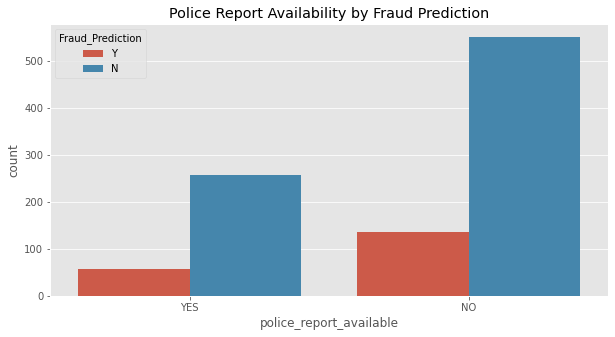

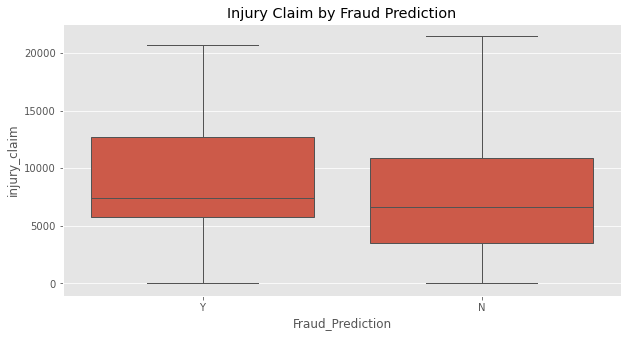

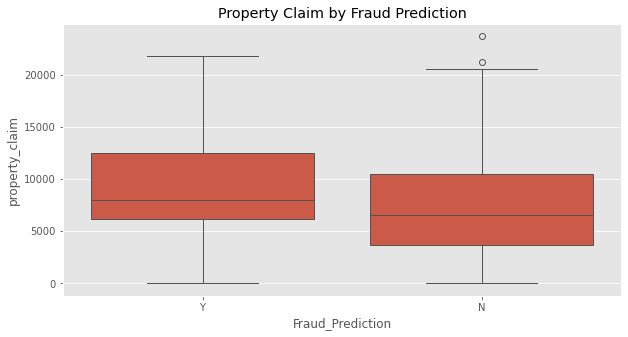

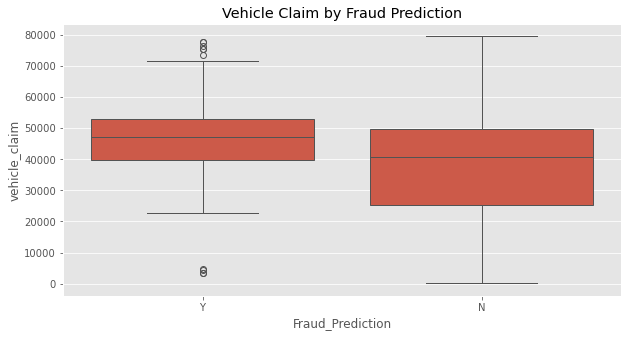

In [66]:
# Boxplots for Bodily Injuries, Witnesses, and Claims by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='bodily_injuries')
plt.title("Bodily Injuries by Fraud Prediction")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='witnesses')
plt.title("Number of Witnesses by Fraud Prediction")
plt.show()

# Countplot for Police Report Available by Fraud Prediction
plt.figure(figsize=(10, 5))
sns.countplot(data=df_cleaned, x='police_report_available', hue='Fraud_Prediction')
plt.title("Police Report Availability by Fraud Prediction")
plt.show()

# Boxplots for Injury, Property, and Vehicle Claims
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='injury_claim')
plt.title("Injury Claim by Fraud Prediction")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='property_claim')
plt.title("Property Claim by Fraud Prediction")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cleaned, x='Fraud_Prediction', y='vehicle_claim')
plt.title("Vehicle Claim by Fraud Prediction")
plt.show()


**Demographic Factors**

1) Education Level:

* Individuals with MD, JD, or PhD degrees show a slight increase in fraud likelihood.

* Fraud cases are spread across all education levels, though higher education levels might be slightly more associated with fraud.

2) Occupation:

* Fraud is more common among individuals in "craft-repair," "machine-op-inspct," and "tech-support" roles.

* Occupations like "armed-forces" and "sales" are associated with fewer fraud cases.

3) Relationship Status:

* Higher fraud likelihood is observed among individuals categorized as "husband," "other-relative," and "own-child."

* Household roles seem to influence the likelihood of fraud, potentially indicating family dynamics at play.

**Incident-Related Factors**

1) Incident Type:
* Fraud cases are more frequent in "Single Vehicle Collision" and "Multi-vehicle Collision" incidents.

* Incidents involving parked cars have fewer fraud cases, suggesting more fraudulent claims in dynamic accident scenarios.

2) Collision Type:
* Rear-end collisions are more associated with fraud compared to side or front collisions.

* This may be due to the difficulty in disputing such incidents or easier falsification.

3) Authorities Contacted:
* Fraud cases are more frequent when the police are involved.

* Contacts with fire or ambulance services have a lower association with fraud.

4) Incident Severity:
* Major damage incidents are linked with higher fraud predictions.

* Lower severity incidents (minor or trivial damage) show fewer fraud cases.

**Claim-Related Factors** 

1) Vehicle Claim Amounts:
* Fraud cases often involve higher median vehicle claim amounts.

* The spread of claim amounts is wider in fraud cases, indicating a tendency for larger or exaggerated claims.

2) Property Damage:
* Fraud cases are more likely when property damage is present.

3) Police Report Availability:
* Fraud cases are more common when a police report is available, which might indicate more formalized incidents.

4) Injury and Property Claims:
* Fraudulent cases have higher injury and property claim amounts on average, reflecting a potential for exaggeration in these claim categories.